In [1]:
# To run WebbPSF:
# first install with pip: pip install --upgrade webbpsf
# then, donwload and unzip "webbpsf-data-LATEST.tar.gz" file from https://webbpsf.readthedocs.io/en/stable/installation.html
# last, set up the $WEBBPSF_PATH to point to the webbpsf-data directory (as in cell[3] below!)

In [1]:
import webbpsf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# For some reason, lensing environment is not interpreting the .bashrc file,
# so I am manually definig the $WEBBPSF_PATH in this Jupyter notebook.
new_path = '/n/home02/nephremidze/cab_survey/abell-s1063/psf_calculation/webbpsf-data'
os.environ['WEBBPSF_PATH'] = new_path
print(os.environ['WEBBPSF_PATH'])

/n/home02/nephremidze/cab_survey/abell-s1063/psf_calculation/webbpsf-data


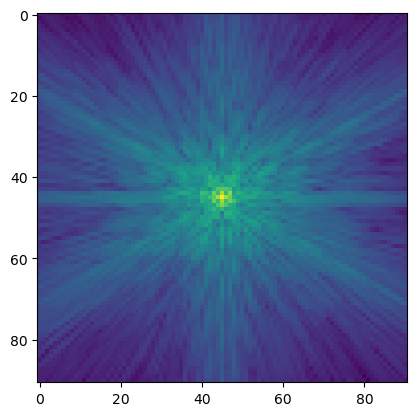

In [5]:
# Define the instrument, pixel size, and filter
nc = webbpsf.NIRCam()
nc.pixelscale = 0.031230659851709842
nc.filter = 'F115W'

# Calculate the PSF
psf = nc.calc_psf(fov_pixels=91,oversample=1) # Using 91x91 pixel field of view
sim_psf = psf[0].data # Extract the PSF as a 2D array

# Plot
plt.imshow(np.log10(psf[0].data), cmap = "viridis")
#webbpsf.display_psf(psf)

# Save the PSF as a numpy array
np.save(f"jwst_psf_{nc.filter}_sim.npy", sim_psf)

Text(0.5, 1.0, 'Simulated PSF')

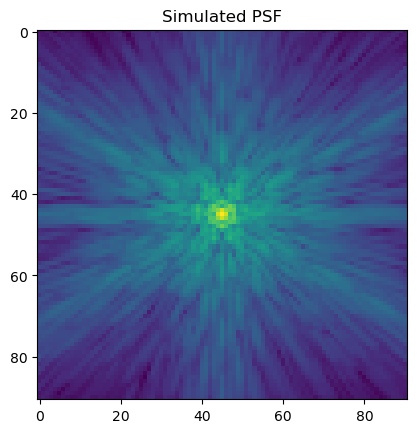

In [4]:
# Plot
plt.imshow(np.log10(psf[0].data), cmap = "viridis")
plt.title("Simulated PSF")
#webbpsf.display_psf(psf)

Text(0.5, 1.0, 'Calculated PSF from SMACS')

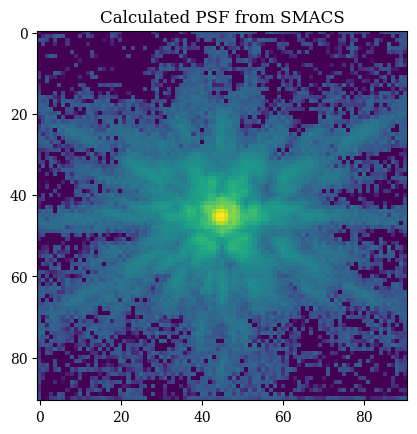

In [26]:
# Plot
plt.imshow(np.log10(smacs_psf+1e-7), cmap = "viridis")
plt.title("Calculated PSF from SMACS")
#webbpsf.display_psf(psf)

In [ ]:
# Plot
plt.imshow(np.log10(psf[0].data), cmap = "viridis")

In [6]:
print(np.shape(sim_psf))

(91, 91)


Calculated PSF average: 0.0001207583625166043
Simulated PSF average: 0.00011733023358251903


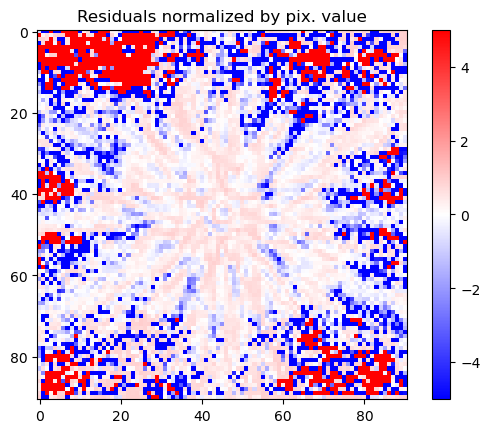

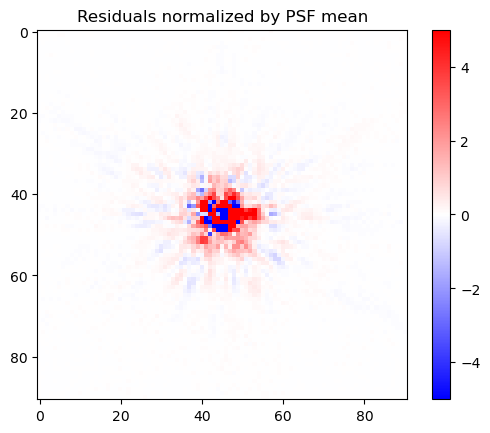

In [11]:
# Just for consistency check, let's compare to the PSF I calculated using stars in the SMACS 0723 field of view

smacs_psf = np.load("/n/home02/nephremidze/spring/3-April/f200w_BIC/nino_data/data/jwst_psf_200_real.npy")
sim_psf = np.load("/n/home02/nephremidze/cab_survey/abell-s1063/psf_calculation/jwst_psf_200_sim.npy")

print("Calculated PSF average:", np.mean(smacs_psf))
print("Simulated PSF average:", np.mean(sim_psf))

plt.figure()
residuals = (smacs_psf - sim_psf)/(smacs_psf)
plt.imshow(residuals, cmap="bwr", vmin = -5, vmax = 5)
plt.colorbar()
plt.title("Residuals normalized by pix. value")
plt.show()

plt.figure()
residuals = (smacs_psf - sim_psf)/np.mean(smacs_psf)
plt.imshow(residuals, cmap="bwr", vmin = -5, vmax = 5)
plt.colorbar()
plt.title("Residuals normalized by PSF mean")
plt.show()

Calculated PSF average: 0.0001207583625166043
Simulated PSF average: 0.00011733023358251903


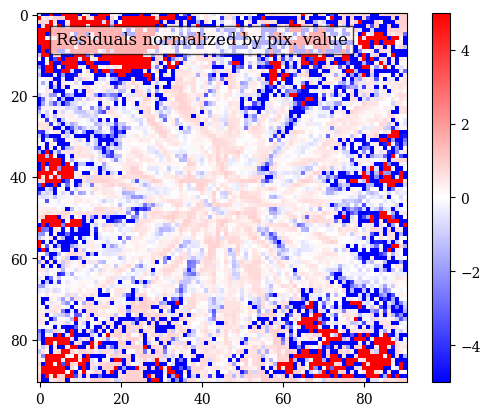

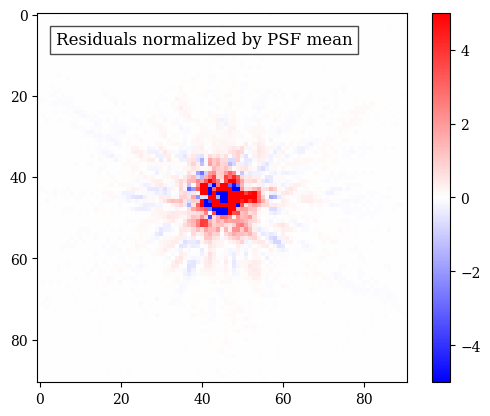

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

# Second Plot
smacs_psf = np.load("/n/home02/nephremidze/spring/3-April/f200w_BIC/nino_data/data/jwst_psf_200_real.npy")
sim_psf = np.load("/n/home02/nephremidze/cab_survey/abell-s1063/psf_calculation/jwst_psf_200_sim.npy")

print("Calculated PSF average:", np.mean(smacs_psf))
print("Simulated PSF average:", np.mean(sim_psf))

plt.figure()
residuals = (smacs_psf - sim_psf) / smacs_psf
plt.imshow(residuals, cmap="bwr", vmin=-5, vmax=5)
plt.colorbar()
plt.text(0.05, 0.95, "Residuals normalized by pix. value", fontsize=12, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
plt.show()

plt.figure()
residuals = (smacs_psf - sim_psf) / np.mean(smacs_psf)
plt.imshow(residuals, cmap="bwr", vmin=-5, vmax=5)
plt.colorbar()
plt.text(0.05, 0.95, "Residuals normalized by PSF mean", fontsize=12, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))
plt.show()


In [11]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Define the coordinates
ra = "7h23m19.5s"
dec = "-73d27m15.6s"

# Convert to SkyCoord object
sky_coord = SkyCoord(ra, dec, frame='icrs')

# Convert to Galactic coordinates
galactic_coord = sky_coord.galactic

# Print the galactic coordinates
print(f"Galactic Longitude: {galactic_coord.l.deg:.2f} degrees")
print(f"Galactic Latitude: {galactic_coord.b.deg:.2f} degrees")

# Determine if the region is close to the Galactic plane
if abs(galactic_coord.b.deg) < 10:
    print("This region is close to the Galactic plane and you can expect a lot of stars from our galaxy.")
else:
    print("This region is not close to the Galactic plane, so there will be fewer stars from our galaxy.")

Galactic Longitude: 284.99 degrees
Galactic Latitude: -23.70 degrees
This region is not close to the Galactic plane, so there will be fewer stars from our galaxy.
